In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

import sys
import os

# Append the parent directory to sys.path
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [2]:
from dotenv import load_dotenv

from research.trades_db_utils import create_connection

load_dotenv()
DB_HOSTNAME = os.getenv('DB_HOSTNAME')
DB_USER = os.getenv('DB_USER')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_PORT = os.getenv('DB_PORT')

In [3]:
# Config

coin_name = 'BTC'
ticker = 'BTCUSDT'


# Coin frequency by name
Could help us to filter spam coins

In [4]:
conn = create_connection(DB_HOSTNAME, 'CoinTrades', DB_USER, DB_PASSWORD)
cursor = conn.cursor()

select_query = """
    select * from (
        SELECT coin_name, count(*) as coin_freq
        FROM CoinTrades.coins  
        group by coin_name
        order by count(*) desc
    ) freq
    where coin_freq > 1
"""

cursor.execute(select_query)

row = cursor.fetchall()
conn.close()

for x in row:
    if x:
        print(x)
    else:
        jsonify({"message": "coin not found"}), 404

('Satoshi Nazimoto', 14)
('YZYCHAIN', 8)
('Satoshi ', 6)
('Stewart', 4)
('109 Stratford Reserve Place ', 3)
('OFFICIAL TRUMP', 3)
('20k=shave my head (LIVE)', 3)
('test', 2)
('ELONS KIDS NAME', 2)
("ELON MUSK'S PHONE NUMBER", 2)
('LAZARUS GROUP', 2)
('ELON NEW TOKEN LEAKED', 2)
('YZY DAO', 2)
('ELONS LAWYER', 2)
('Pongting', 2)
('ELONS NEWBORN SON NAME', 2)


# Trades per coin 
might want to make a classifier to somehow predict whether a coin will have a certain amount of trades

In [15]:
conn = create_connection(DB_HOSTNAME, 'CoinTrades', DB_USER, DB_PASSWORD)
cursor = conn.cursor()

select_query = """
    select coin_name, coin_freq
    from (
        select coin_id, count(*) as coin_freq 
        from CoinTrades.trades
        group by coin_id
    ) t
    join CoinTrades.coins c on c.id = t.coin_id
"""

cursor.execute(select_query)

row = cursor.fetchall()
conn.close()

df = pd.DataFrame(row, columns=['coin_name', 'coin_freq'])
df.sort_values(by='coin_freq', ascending=False, inplace=True)
df.head(10)



,coin_name,coin_freq
37,109 Stratford Reserve Place,1309
93,MAGA PNUT - CTO,1135
149,DITCHY DAT DUDE,801
190,yezus,768
91,smol pope,736
202,fon,681
187,Satoshi,477
199,ELONS NEWBORN SON NAME,396
143,Stewart,318
185,Every Guy,305


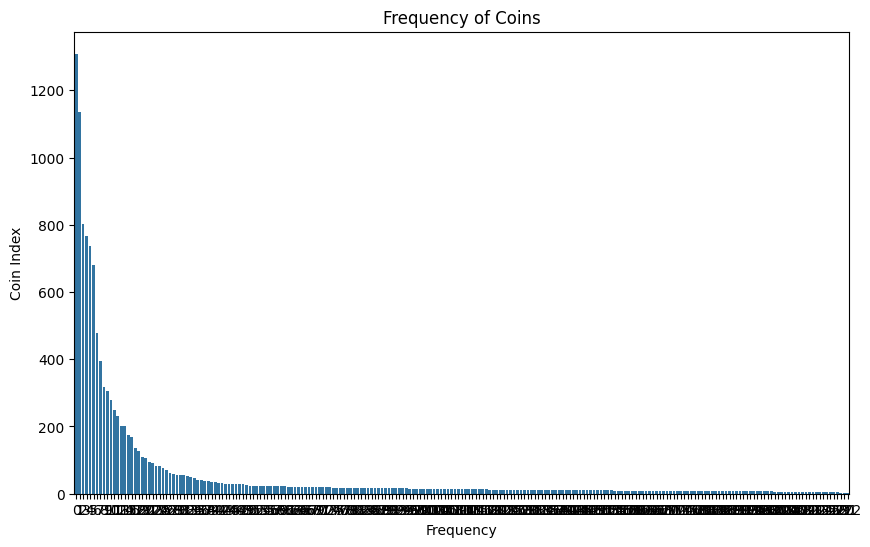

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(y='coin_freq', x=range(len(df)), data=df)
plt.title('Frequency of Coins')
plt.xlabel('Coin Index')
plt.ylabel('Trades')
plt.show()